# Diamond Cut
What Are Diamond Cut Grades?
Diamond cut grades were established by the GIA to create a universal system for evaluating the cut quality of any diamond.

Gemologists use this system to assign one of five cut grades to a diamond (except for Round Brilliant diamonds which have their own cut grades). Diamond cut grades indicate the quality, not the type, of a diamond cut and will greatly impact the diamond price.

When buying a diamond, always look for a diamond cut grade to ensure its quality.


Diamond Cut Grade Chart
Use the chart below to understand the different diamond cut grades.

Ideal+Hearts

This is the top cut grade and is only used for Round Brilliant cut diamonds. It is a superior ideal cut with perfect optical symmetry displaying hearts and arrows-shaped patterns when viewed from the table down and up. Only <1% of all diamonds are Ideal + Hearts..

Ideal

Ideal is the next highest cut grade reserved for Round Brilliant cut diamonds. Ideal diamonds are cut to maximize brilliance with perfect proportions. This is a rare quality held by <1% of all diamonds.

Excellent

Excellent is the highest cut grade for all diamond shapes outside of Round Brilliants. It’s a perfect premium cut proportioned to return the maximum brilliance possible.

Very Good

A very good cut means that defects are invisible to the naked eye. This can be a wonderful cut grade for shoppers that are prioritizing other Cs or looking for diamonds at a more accessible price point.

Good

Good means that any defects are still invisible to the naked eye. VRAI does not offer diamonds of this cut grade.

Fair

Fair diamonds have defects that may be visible to the naked eye. VRAI does not offer diamonds of this grade.

Poor

Poor diamonds have defects that are visible to the naked eye. VRAI does not offer diamonds of this grade.

# Data ingestion

In [28]:
import pandas as pd
import numpy as np

In [29]:
Data = pd.read_csv(r"D:\ineuron all\practice\after 30.06.25\Project1_DiamondPricePrediction\notebooks\data\gemstone.csv")

In [30]:
Data

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [31]:
data = Data.drop(labels=["id"],axis=1)

# EDA

In [32]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [33]:
data.tail()

,carat,cut,color,clarity,depth,table,x,y,z,price
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681
193572,0.71,Good,E,SI2,60.8,64.0,5.73,5.71,3.48,2258


In [34]:
data.sample(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
28616,0.30,Premium,E,VVS2,62.5,58.0,4.30,4.32,2.70,741
160761,0.33,Ideal,H,VS2,61.9,55.0,4.44,4.48,2.76,533
36410,0.30,Ideal,I,VVS2,61.5,56.0,4.33,4.35,2.67,529
86559,0.31,Ideal,H,VVS2,61.9,57.0,4.32,4.34,2.68,625
192028,1.01,Good,H,SI1,63.8,58.0,6.36,6.27,4.02,4559


In [35]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB


In [37]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [38]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
193568    False
193569    False
193570    False
193571    False
193572    False
Length: 193573, dtype: bool

In [39]:
data.duplicated().sum()

np.int64(0)

In [40]:
data.shape

(193573, 10)

# Categorical vs. numerical Data

In [41]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [42]:
categorical_column = data.columns[data.dtypes=="object"]

In [43]:
categorical_column 

Index(['cut', 'color', 'clarity'], dtype='object')

In [44]:
numerical_column = data.columns[data.dtypes!="object"]

In [45]:
numerical_column

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [46]:
data[categorical_column]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [47]:
data[numerical_column]

,carat,depth,table,x,y,z,price
0,1.52,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,61.6,56.0,4.38,4.41,2.71,666
4,1.70,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...
193568,0.31,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,62.9,55.0,4.45,4.49,2.81,681


In [48]:
data[categorical_column].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [49]:
data[numerical_column].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [50]:
data[numerical_column].describe().T


,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [51]:
data[categorical_column].value_counts()

cut    color  clarity
Ideal  E      VS2        5490
       G      VS2        5131
              VS1        5107
       E      SI1        4309
       F      VS2        4235
                         ... 
       J      I1            2
Fair   G      IF            2
Good   J      IF            1
Fair   D      VVS1          1
       F      IF            1
Name: count, Length: 276, dtype: int64

In [ ]:
data[categorical_column]["cut"].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [53]:
data[categorical_column]["color"].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [54]:
data[categorical_column]["clarity"].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

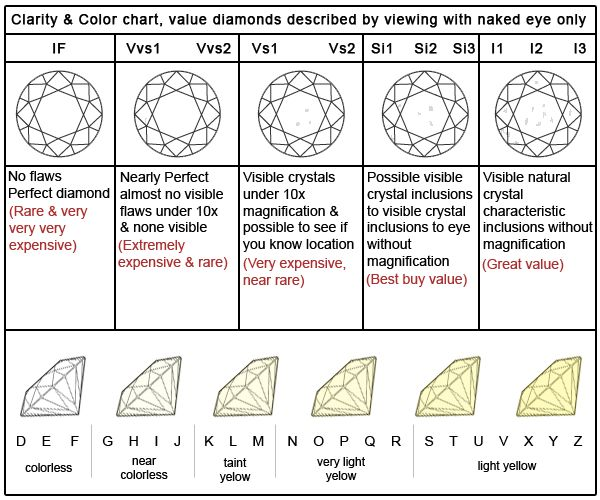

# Numerical Data plot

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

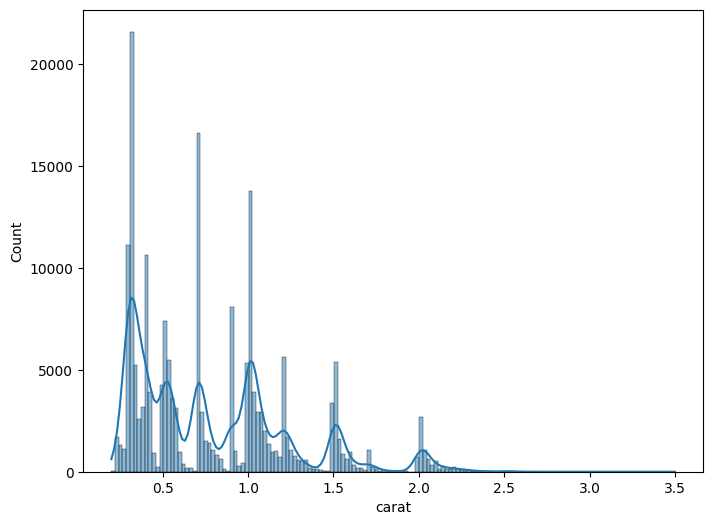

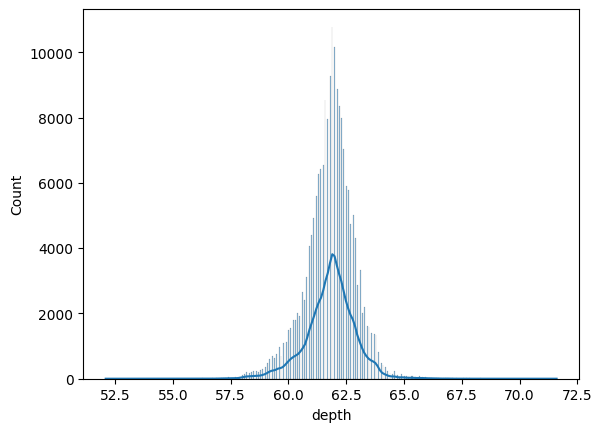

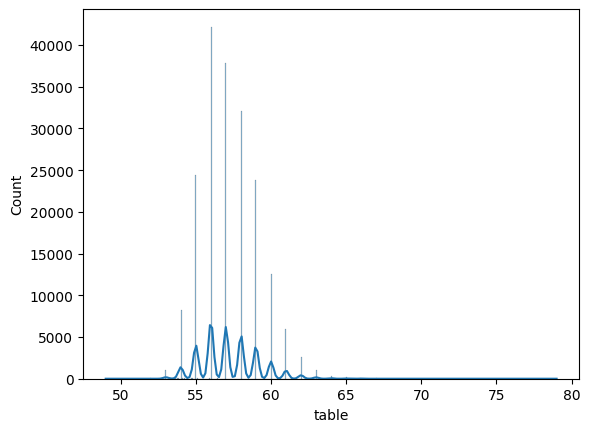

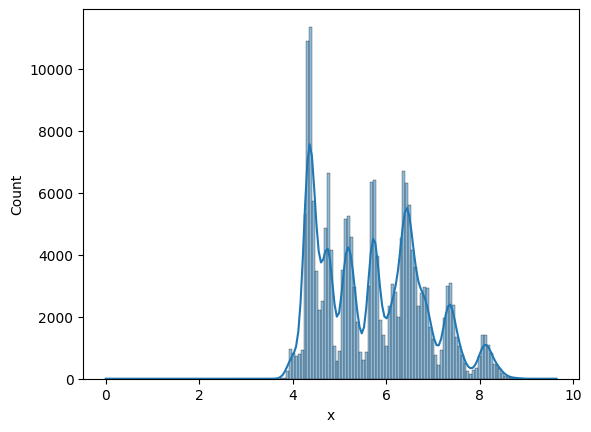

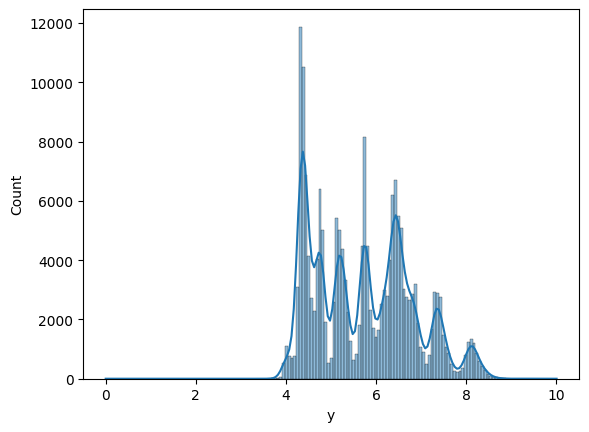

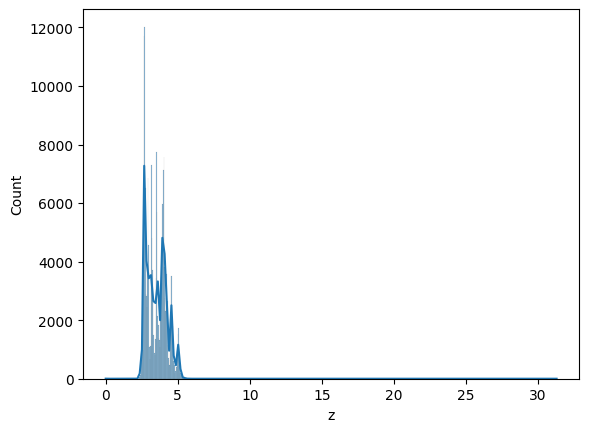

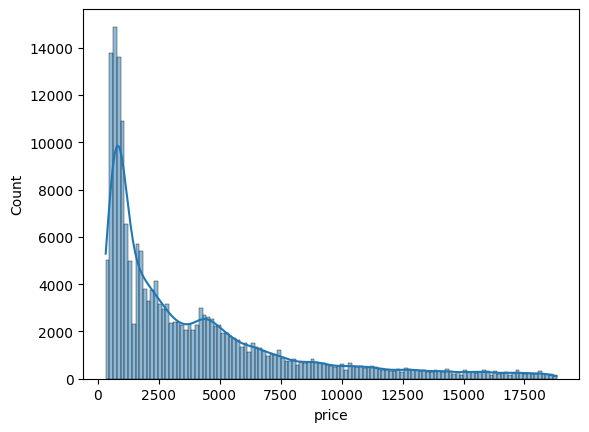

In [65]:
plt.figure(figsize=(8,6))

for col in numerical_column:
    sns.histplot(data=data,x=col,kde=True)
    print("\n")
    plt.show()

<Axes: >

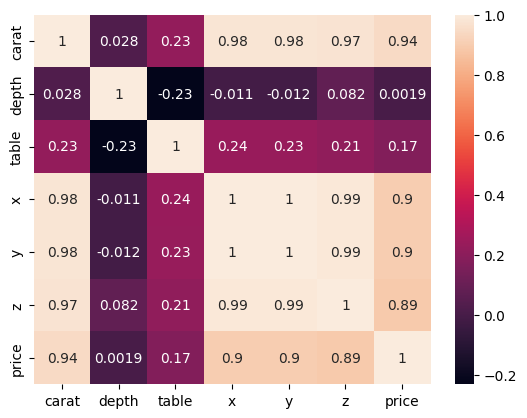

In [70]:
sns.heatmap(data[numerical_column].corr(),annot=True)

# Categorical data plot

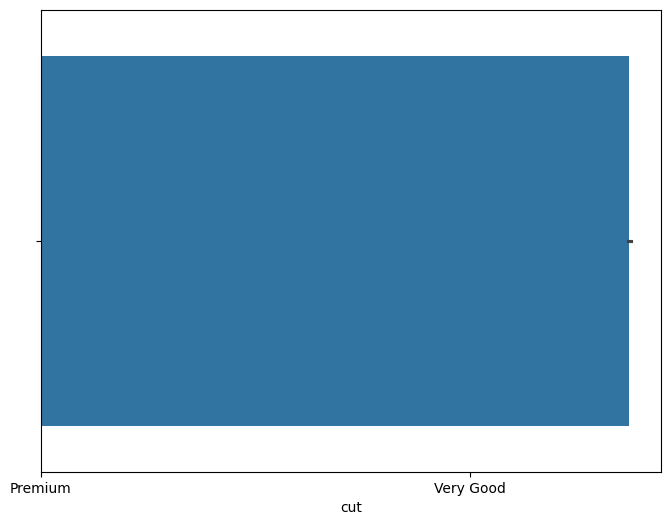

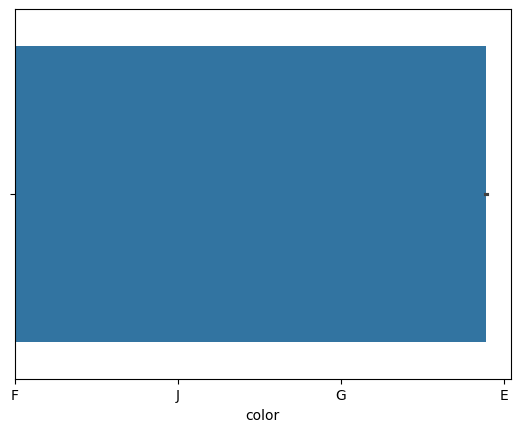

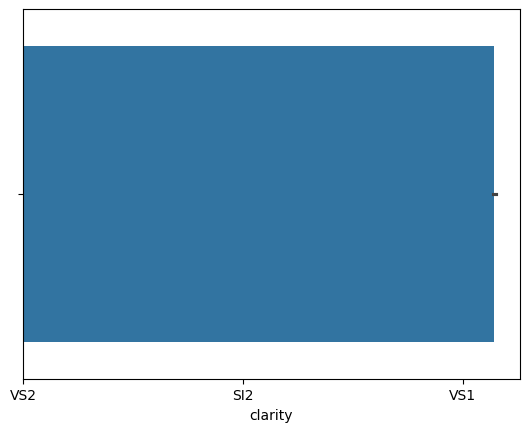

In [67]:
plt.figure(figsize=(8,6))

for col in categorical_column:
    sns.barplot(data=data,x=col)
    print("\n")
    plt.show()

# Encoding

In [71]:
data["clarity"].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [72]:
data["cut"].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [73]:
data["color"].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [74]:
# it is a ordinal encoding
cut_map = {'Fair':1, 'Good':2, 'Very Good':3,'Premium':4,'Ideal':5}
clarity_map = {'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}
color_map = {'D':1, 'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7}

In [75]:
data["cut"] = data["cut"].map(cut_map)
data["clarity"] = data["clarity"].map(clarity_map)
data["color"] = data["color"].map(color_map)

In [76]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [63]:
X=data.drop(labels=["price"],axis=1)

In [56]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81


In [57]:
y=data[["price"]]

In [58]:
y

,price
0,13619
1,13387
2,2772
3,666
4,14453
...,...
193568,1130
193569,2874
193570,3036
193571,681
